<a href="https://colab.research.google.com/github/htapiagroup/introduccion-a-numpy-ManuelD22/blob/master/notebooks/01.06-Boolean-Arrays-and-Masks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<!--BOOK_INFORMATION-->
<img align="left" style="padding-right:10px;" src="https://github.com/ManuelD22/TallerPythonIntroCienciaDatos/blob/master/notebooks/figures/header_small.png?raw=1">

*Esta libreta contiene material del Taller de Python que se lleva a cabo como parte del 
evento [Data Challenge Industrial 4.0](www.lania.mx/dci). El contenido ha sido adaptado 
por HTM y GED a partir del libro [Python Data Science Handbook](http://shop.oreilly.com/product/0636920034919.do) 
de Jake VanderPlas y se mantiene la licencia sobre el texto, 
[CC-BY-NC-ND license](https://creativecommons.org/licenses/by-nc-nd/3.0/us/legalcode), 
y sobre el codigo [MIT license](https://opensource.org/licenses/MIT).*

<!--NAVIGATION-->
< [Cálculos con Arrays 2. Broadcasting](01.05-Computation-on-arrays-broadcasting.ipynb) | [Contenido](Index.ipynb) | [Indexado elegante](01.07-Fancy-Indexing.ipynb) >

<a href="https://colab.research.google.com/github/htapia/TallerPythonIntroCienciaDatos/blob/master/notebooks/01.06-Boolean-Arrays-and-Masks.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# Comparaciones, máscaras y lógica booleana

## Ejemplo: Contando días


In [2]:
import numpy as np
import pandas as pd

# use pandas to extract rainfall inches as a NumPy array
# se agregó el url ya que no se encontraba el archivo
rainfall = pd.read_csv('https://raw.githubusercontent.com/jakevdp/PythonDataScienceHandbook/master/notebooks/data/Seattle2014.csv')['PRCP'].values
inches = rainfall / 254.0  # 1/10mm -> inches
inches.shape

(365,)

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot styles

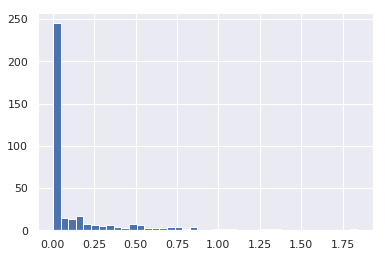

In [4]:
plt.hist(inches, 40);

## Operadores de comparación como ufuncs

- En [Cálculos con Arrays 1. Ufuncs](01.03-Computation-on-arrays-ufuncs.ipynb)  introducimos ufuncs en particular operadores aritméticos ``+``, ``-``, ``*``, ``/``, y otros

- NumPy  implementa operadores de comparación ``<`` (menor que) y ``>`` (mayor que)

In [0]:
x = np.array([1, 2, 3, 4, 5])

In [6]:
x < 3  # less than

array([ True,  True, False, False, False])

In [7]:
x > 3  # greater than

array([False, False, False,  True,  True])

In [8]:
x <= 3  # less than or equal

array([ True,  True,  True, False, False])

In [9]:
x >= 3  # greater than or equal

array([False, False,  True,  True,  True])

In [10]:
x != 3  # not equal

array([ True,  True, False,  True,  True])

In [11]:
x == 3  # equal

array([False, False,  True, False, False])

In [12]:
(2 * x) == (x ** 2)

array([False,  True, False, False, False])

Como es el caso de los operadores aritmeticos, los operadores de comparacion se implementan como ufuncs in NumPy; por ejemplo, cuando escribes ``x < 3``, internamente NumPy utiliza ``np.less(x, 3)``.
    Aqui se muestra un resumen de los operadores de comparacion y su funcion equivalente:

| Operator	    | Equivalent ufunc    || Operator	   | Equivalent ufunc    |
|---------------|---------------------||---------------|---------------------|
|``==``         |``np.equal``         ||``!=``         |``np.not_equal``     |
|``<``          |``np.less``          ||``<=``         |``np.less_equal``    |
|``>``          |``np.greater``       ||``>=``         |``np.greater_equal`` |

In [13]:
rng = np.random.RandomState(0)
x = rng.randint(10, size=(3, 4))
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [14]:
x < 6

array([[ True,  True,  True,  True],
       [False, False,  True,  True],
       [ True,  True, False, False]])

## Usando Arrays Booleanos

In [15]:
print(x)

[[5 0 3 3]
 [7 9 3 5]
 [2 4 7 6]]


### Contando entradas

In [16]:
# how many values less than 6?
np.count_nonzero(x < 6)

8

In [17]:
np.sum(x < 6)

8

In [18]:
# Cuantos valores menores a 6 tiene cada fila?
np.sum(x < 6, axis=1)

array([4, 2, 2])

In [19]:
# Hay valores mayores a 8?
np.any(x > 8)

True

In [20]:
# Hay algun valor menor que zero(0)?
np.any(x < 0)

False

In [21]:
# son todos los valores menores a 10?
np.all(x < 10)

True

In [22]:
# son todos los valores iguales a 6?
np.all(x == 6)

False

``np.all`` and ``np.any`` tambien se puede usar a lo largo de los ejes particulares, por ejemplo:

In [23]:
# son todos los valores en cada fila menores a 8?
np.all(x < 8, axis=1)

array([ True, False,  True])

### Operadores Booleanos

In [24]:
np.sum((inches > 0.5) & (inches < 1))

29

In [25]:
np.sum(~( (inches <= 0.5) | (inches >= 1) ))

29

| Operator	    | Equivalent ufunc    || Operator	    | Equivalent ufunc    |
|---------------|---------------------||---------------|---------------------|
|``&``          |``np.bitwise_and``   ||&#124;         |``np.bitwise_or``    |
|``^``          |``np.bitwise_xor``   ||``~``          |``np.bitwise_not``   |

In [26]:
print("Numero de dias sin lluvia:      ", np.sum(inches == 0))
print("Numero de dias con lluvia:         ", np.sum(inches != 0))
print("Dias con mas de 0.5 pulgadas:", np.sum(inches > 0.5))
print("Dias lluviosos con < 0.2 pulgadas  :", np.sum((inches > 0) &
                                                (inches < 0.2)))

('Numero de dias sin lluvia:      ', 215)
('Numero de dias con lluvia:         ', 150)
('Dias con mas de 0.5 pulgadas:', 37)
('Dias lluviosos con < 0.2 pulgadas  :', 75)


## Máscaras de Arrays Booleanos


In [27]:
x

array([[5, 0, 3, 3],
       [7, 9, 3, 5],
       [2, 4, 7, 6]])

In [28]:
x < 5

array([[False,  True,  True,  True],
       [False, False,  True, False],
       [ True,  True, False, False]])

In [29]:
x[x < 5]

array([0, 3, 3, 3, 2, 4])

In [30]:
# construya una mascara de todos los dias lluviosos
rainy = (inches > 0)

# construya una mascara de todos los dias de verano(el 21 de junio es el dia 172)
days = np.arange(365)
summer = (days > 172) & (days < 262)

print("Precipitacion media en dias lluviosos en 2014 (pulgadas):   ",
      np.median(inches[rainy]))
print("Precipitacion media en dias de verano en 2014 (pulgadas):  ",
      np.median(inches[summer]))
print("Precipitacion maxima en dias de verano en 2014 (pulgadas): ",
      np.max(inches[summer]))
print("Precipitacion media en dias lluviosos que no son en verano (pulgadas):",
      np.median(inches[rainy & ~summer]))

('Precipitacion media en dias lluviosos en 2014 (pulgadas):   ', 0.19488188976377951)
('Precipitacion media en dias de verano en 2014 (pulgadas):  ', 0.0)
('Precipitacion maxima en dias de verano en 2014 (pulgadas): ', 0.8503937007874016)
('Precipitacion media en dias lluviosos que no son en verano (pulgadas):', 0.20078740157480315)


## Usar las palabras reservadas ``and``/``or`` contra usar los operadores ``&``/``|``


In [32]:
bool(42), bool(0)

(True, False)

In [33]:
bool(42 and 0)

False

In [34]:
bool(42 or 0)

True

In [35]:
bin(42)

'0b101010'

In [36]:
bin(59)

'0b111011'

In [37]:
bin(42 & 59)

'0b101010'

In [38]:
bin(42 | 59)

'0b111011'

In [39]:
A = np.array([1, 0, 1, 0, 1, 0], dtype=bool)
B = np.array([1, 1, 1, 0, 1, 1], dtype=bool)
A | B

array([ True,  True,  True, False,  True,  True])

In [49]:
# error ilustrativo
A or B      # la palabra reservada "or" resulta ambigua en arreglos

ValueError: ignored

In [51]:
x = np.arange(10)
(x > 4) & (x < 8)

array([False, False, False, False, False,  True,  True,  True, False,
       False])

In [52]:
# error ilustrativo
(x > 4) and (x < 8)     # la palabra "and" resulta ambigua en arreglos

ValueError: ignored

<!--NAVIGATION-->
< [Cálculos con Arrays 2. Broadcasting](01.05-Computation-on-arrays-broadcasting.ipynb) | [Contenido](Index.ipynb) | [Indexado elegante](01.07-Fancy-Indexing.ipynb) >

<a href="https://colab.research.google.com/github/htapia/TallerPythonIntroCienciaDatos/blob/master/notebooks/01.06-Boolean-Arrays-and-Masks.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
